### Analysis of Red wine data

In [2]:
from path import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [3]:
red_data = Path('all_wines.csv')
red_df = pd.read_csv(red_data)
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red


#### Filter to red wines only

In [4]:
red_df = red_df[red_df["color"] == "red"]
red_df.shape

(1599, 14)

In [5]:
# Missing Values
print(red_df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
sulphates               0
alcohol                 0
ph                      0
quality                 0
id                      0
color                   0
dtype: int64


In [6]:
red_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,800.000000
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,461.735855
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,400.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,800.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1199.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1599.000000


In [7]:
corr = red_df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,-0.268484
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.008815
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,-0.153551
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.031261
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.119869
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.090480
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.117850
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.368372
sulphates,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,0.136005
alcohol,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,-0.125307


#### Categorize quality to >=7 as Good and < 7 and Not good

In [8]:
red_df['quality_2'] = (red_df['quality'] >=  7).astype(int)

In [9]:
red_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color,quality_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,6,red,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,7,red,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,8,red,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,9,red,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,10,red,0


#### Create Target and Features
- quality_2 is the binary outcome (1-Good, 0-Not good)
- quality, id, color are dropped since they aren't needed in the model

In [10]:
y = red_df["quality_2"]
X = red_df.drop(columns=["quality","quality_2","id","color"])

In [11]:
X.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [12]:
y.value_counts()

0    1382
1     217
Name: quality_2, dtype: int64

#### Scale the data
- Scale the data since there is such a wide range of values between features. Scaling will make all the model results comparable

In [13]:
data_scaler = StandardScaler()

In [14]:
X_scaled = data_scaler.fit_transform(X)
# X_scaled

#### Split the data into test and train

In [15]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=7)

In [16]:
y_train.value_counts()

0    1033
1     166
Name: quality_2, dtype: int64

In [17]:
X_scaled.shape

(1599, 11)

## Logistic model
_Benefits_ - Simple to implement and effective; it works with feature scaling but does not require it.  
_Limitations_ - Poor performance on non-linear data or where features are not highly correlated.

In [18]:
model1 = LogisticRegression(solver='lbfgs',random_state=7)

In [19]:
model1.fit(X_train, y_train)

LogisticRegression(random_state=7)

#### Model predictions

In [20]:
y_pred1 = model1.predict(X_test)

In [21]:
matrix1 = confusion_matrix(y_test, y_pred1)
print(matrix1)

[[329  20]
 [ 29  22]]


In [22]:
report1 = classification_report(y_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       349
           1       0.52      0.43      0.47        51

    accuracy                           0.88       400
   macro avg       0.72      0.69      0.70       400
weighted avg       0.87      0.88      0.87       400



In [23]:
importance = model1.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.842461
0,fixed_acidity,0.618401
9,alcohol,0.536259
3,residual_sugar,0.356410
5,free_sulfur_dioxide,0.046747
2,citric_acid,0.002807
8,sulphates,-0.019941
4,chlorides,-0.370528
6,total_sulfur_dioxide,-0.392125
1,volatile_acidity,-0.465505


## SVM
_Benefits_ - Does better at handling a higher number of features.  Useful when classes can be easily separated.  Outliers have less impact.  
_Limitations_ - For larger datasets, it requires a large amount of time to process.  In the case of overlapped classes it does nt perform well.

In [24]:
# Linear kernel did not work
model2 = SVC(kernel='rbf',random_state=7)

In [25]:
model2.fit(X_train, y_train)

SVC(random_state=7)

In [26]:
y_pred2 = model2.predict(X_test)

In [27]:
matrix2 = confusion_matrix(y_test, y_pred2)
print(matrix2)

[[336  13]
 [ 34  17]]


In [28]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       349
           1       0.57      0.33      0.42        51

    accuracy                           0.88       400
   macro avg       0.74      0.65      0.68       400
weighted avg       0.86      0.88      0.87       400



In [29]:
accuracy_score(y_test, y_pred2)

0.8825

## Decision tree
_Benefits_ - Scaling or normalization of data is not required.  Can handle missing values.  
_Limitations_ Prone to overfitting.  Higher time required to train decision trees.

In [30]:
model3 = tree.DecisionTreeClassifier(random_state=7)

In [31]:
model3 = model3.fit(X_train, y_train)

In [32]:
y_pred3 = model3.predict(X_test)

In [33]:
matrix3 = confusion_matrix(y_test, y_pred3)
print(matrix3)

[[305  44]
 [ 24  27]]


In [34]:
report3 = classification_report(y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       349
           1       0.38      0.53      0.44        51

    accuracy                           0.83       400
   macro avg       0.65      0.70      0.67       400
weighted avg       0.86      0.83      0.84       400



In [35]:
accuracy_score(y_test, y_pred3)

0.83

In [36]:
importance = model3.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.249580
8,sulphates,0.136080
9,alcohol,0.114116
0,fixed_acidity,0.087731
1,volatile_acidity,0.081758
5,free_sulfur_dioxide,0.081022
2,citric_acid,0.078951
3,residual_sugar,0.045753
7,density,0.045384
6,total_sulfur_dioxide,0.040393


## Random Forest Classifier
_Benefits_ - Less prone to overfitting.  
_Limitations_ - Features need to have some predictive power or else they wont work.

In [37]:
model4 = RandomForestClassifier(n_estimators=128,random_state=7) 

In [38]:
model4 = model4.fit(X_train, y_train)

In [39]:
y_pred4 = model4.predict(X_test)

In [40]:
matrix4 = confusion_matrix(y_test, y_pred4)
print(matrix4)

[[333  16]
 [ 25  26]]


In [41]:
report4 = classification_report(y_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       349
           1       0.62      0.51      0.56        51

    accuracy                           0.90       400
   macro avg       0.77      0.73      0.75       400
weighted avg       0.89      0.90      0.89       400



In [42]:
accuracy_score(y_test, y_pred4)

0.8975

In [43]:
importance = model4.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.169798
1,volatile_acidity,0.120064
9,alcohol,0.112396
7,density,0.092389
6,total_sulfur_dioxide,0.083003
2,citric_acid,0.079479
0,fixed_acidity,0.075408
4,chlorides,0.072150
3,residual_sugar,0.071893
8,sulphates,0.062759


## Gradient Boosted Tree
_Benefits_ - Often provides more predictive accuracy. Lots of flexibility. No data pre-processing required. 

_Limitations_ - Training generally takes longer. It will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.

In [44]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.887
Accuracy score (validation): 0.880

Learning rate:  0.1
Accuracy score (training): 0.914
Accuracy score (validation): 0.882

Learning rate:  0.25
Accuracy score (training): 0.944
Accuracy score (validation): 0.882

Learning rate:  0.5
Accuracy score (training): 0.959
Accuracy score (validation): 0.892

Learning rate:  0.75
Accuracy score (training): 0.973
Accuracy score (validation): 0.865

Learning rate:  1
Accuracy score (training): 0.973
Accuracy score (validation): 0.858



#### Choose the learning_rate based on highest Accuracy score = 0.5

In [45]:
model5 = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.5, max_features=10, max_depth=3, random_state=7)

In [46]:
model5 = model5.fit(X_train, y_train)

In [47]:
y_pred5 = model5.predict(X_test)

In [48]:
matrix5 = confusion_matrix(y_test, y_pred5)
print(matrix5)

[[332  17]
 [ 29  22]]


In [49]:
report5 = classification_report(y_test, y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       349
           1       0.56      0.43      0.49        51

    accuracy                           0.89       400
   macro avg       0.74      0.69      0.71       400
weighted avg       0.87      0.89      0.88       400



In [50]:
accuracy_score(y_test, y_pred5)

0.885

In [51]:
importance = model5.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.306515
6,total_sulfur_dioxide,0.131908
9,alcohol,0.126080
1,volatile_acidity,0.122331
5,free_sulfur_dioxide,0.097373
3,residual_sugar,0.054741
4,chlorides,0.045010
2,citric_acid,0.040504
7,density,0.038264
8,sulphates,0.018796


### The next 3 models use oversampling and undersampling because of imbalanced sample sizes.

## Random Over Sampling

_Benefits_ - Randomly duplicate examples in the minority class. This makes it simple to implement and fast to execute. 

_Limitations_ - Increase in training time for the classifier and can lead to model overfitting.

In [52]:
ros = RandomOverSampler(random_state=7)

In [53]:
Counter(y_train)

Counter({0: 1033, 1: 166})

In [54]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#### New balanced sample sizes

In [55]:
Counter(y_resampled)

Counter({0: 1033, 1: 1033})

In [56]:
# Train the Logistic Regression model using the resampled data
model6 = LogisticRegression(solver='lbfgs', random_state=7)

In [57]:
model6.fit(X_resampled, y_resampled)

LogisticRegression(random_state=7)

In [58]:
y_pred6 = model6.predict(X_test)

In [59]:
print(balanced_accuracy_score(y_test, y_pred6))

0.8306365526153154


In [60]:
confusion_matrix(y_test, y_pred6)

array([[265,  84],
       [  5,  46]], dtype=int64)

In [61]:
report6 = classification_report_imbalanced(y_test, y_pred6)
print(report6)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.76      0.90      0.86      0.83      0.68       349
          1       0.35      0.90      0.76      0.51      0.83      0.69        51

avg / total       0.90      0.78      0.88      0.81      0.83      0.68       400



In [62]:
importance = model6.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.942781
0,fixed_acidity,0.898591
9,alcohol,0.602835
3,residual_sugar,0.427579
5,free_sulfur_dioxide,0.091059
8,sulphates,0.035186
4,chlorides,-0.188786
2,citric_acid,-0.202176
6,total_sulfur_dioxide,-0.469851
1,volatile_acidity,-0.499269


## SMOTE (Synthetic Minority Over-sampling Technique) oversampling

_Benefits_ -  Less likely to overfit. Seems to work well with low dimensional data. 

_Limitations_ - SMOTE does not take into consideration neighboring examples can be from other classes. This can increase the overlapping of classes and can introduce additional noise.

In [63]:
X_resampled, y_resampled = SMOTE(random_state=7,sampling_strategy='auto').fit_resample(
   X_train, y_train)

#### New balanced sample sizes

In [64]:
Counter(y_resampled)

Counter({0: 1033, 1: 1033})

In [65]:
model7 = LogisticRegression(solver='lbfgs', random_state=7)
model7.fit(X_resampled, y_resampled)

LogisticRegression(random_state=7)

In [66]:
y_pred7 = model7.predict(X_test)
balanced_accuracy_score(y_test, y_pred7)

0.8447384684532839

In [67]:
confusion_matrix(y_test, y_pred7)

array([[268,  81],
       [  4,  47]], dtype=int64)

In [68]:
report7 = classification_report_imbalanced(y_test, y_pred7)
print(report7)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.77      0.92      0.86      0.84      0.70       349
          1       0.37      0.92      0.77      0.53      0.84      0.72        51

avg / total       0.91      0.79      0.90      0.82      0.84      0.70       400



In [69]:
importance = model7.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,1.072563
0,fixed_acidity,0.808048
9,alcohol,0.615908
3,residual_sugar,0.376058
5,free_sulfur_dioxide,0.178504
8,sulphates,-0.049215
2,citric_acid,-0.287617
4,chlorides,-0.499886
7,density,-0.555367
1,volatile_acidity,-0.572576


## Cluster Centroid Undersampling

_Benefits_ - Less likely to overfit. 

_Limitations_ - The result of the analysis may be less accurate.

In [70]:
cc = ClusterCentroids(random_state=7)

In [71]:
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [72]:
Counter(y_resampled)

Counter({0: 166, 1: 166})

In [73]:
model8 = LogisticRegression(solver='lbfgs', random_state=7, max_iter=1000)
model8.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=7)

In [74]:
y_pred8 = model8.predict(X_test)

In [75]:
balanced_accuracy_score(y_test, y_pred8)

0.8165346367773471

In [76]:
confusion_matrix(y_test, y_pred8)

array([[262,  87],
       [  6,  45]], dtype=int64)

In [77]:
report8 = classification_report_imbalanced(y_test, y_pred8)
print(report8)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.75      0.88      0.85      0.81      0.65       349
          1       0.34      0.88      0.75      0.49      0.81      0.67        51

avg / total       0.90      0.77      0.87      0.80      0.81      0.66       400



In [78]:
importance = model8.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.983138
0,fixed_acidity,0.470870
9,alcohol,0.286890
5,free_sulfur_dioxide,0.021236
3,residual_sugar,0.004180
8,sulphates,-0.208731
7,density,-0.248779
2,citric_acid,-0.332573
6,total_sulfur_dioxide,-0.396660
4,chlorides,-0.491394


##  Balanced Random Forest Classifier
_Benefits_ - It reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy. 

_Limitations_ -  Requires much more computational power and resources. Longer Training Period.

In [79]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=7) 

In [80]:
model9 = brf_model.fit(X_train, y_train)

In [81]:
y_pred9 = model9.predict(X_test)

In [82]:
balanced_accuracy_score(y_test, y_pred9)

0.8433058036968368

In [83]:
confusion_matrix(y_test, y_pred9)

array([[267,  82],
       [  4,  47]], dtype=int64)

In [84]:
report9 = classification_report_imbalanced(y_test, y_pred9)
print(report9)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.77      0.92      0.86      0.84      0.69       349
          1       0.36      0.92      0.77      0.52      0.84      0.72        51

avg / total       0.91      0.79      0.90      0.82      0.84      0.70       400



In [85]:
importance = model9.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.233499
1,volatile_acidity,0.128257
9,alcohol,0.116748
2,citric_acid,0.083079
7,density,0.076444
6,total_sulfur_dioxide,0.074452
0,fixed_acidity,0.070034
4,chlorides,0.067913
8,sulphates,0.053655
3,residual_sugar,0.049013


## Easy Ensemble AdaBoost 
_Benefits_ - Fast, simple, and easy to program. Also, it has the flexibility to be combined with any machine learning algorithm. 

_Limitations_ - Weak classifiers can lead to overfitting.

In [86]:
eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=7)

In [87]:
model10 = eec_model.fit(X_train, y_train)

In [88]:
y_pred10 = model10.predict(X_test)

In [89]:
balanced_accuracy_score(y_test, y_pred10)

0.8177425698072925

In [90]:
confusion_matrix(y_test, y_pred10)

array([[256,  93],
       [  5,  46]], dtype=int64)

In [91]:
report10 = classification_report_imbalanced(y_test, y_pred10)
print(report10)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.73      0.90      0.84      0.81      0.65       349
          1       0.33      0.90      0.73      0.48      0.81      0.67        51

avg / total       0.90      0.76      0.88      0.79      0.81      0.65       400



#### Attempt a cool graphic of the decision tree model but a little too complicated

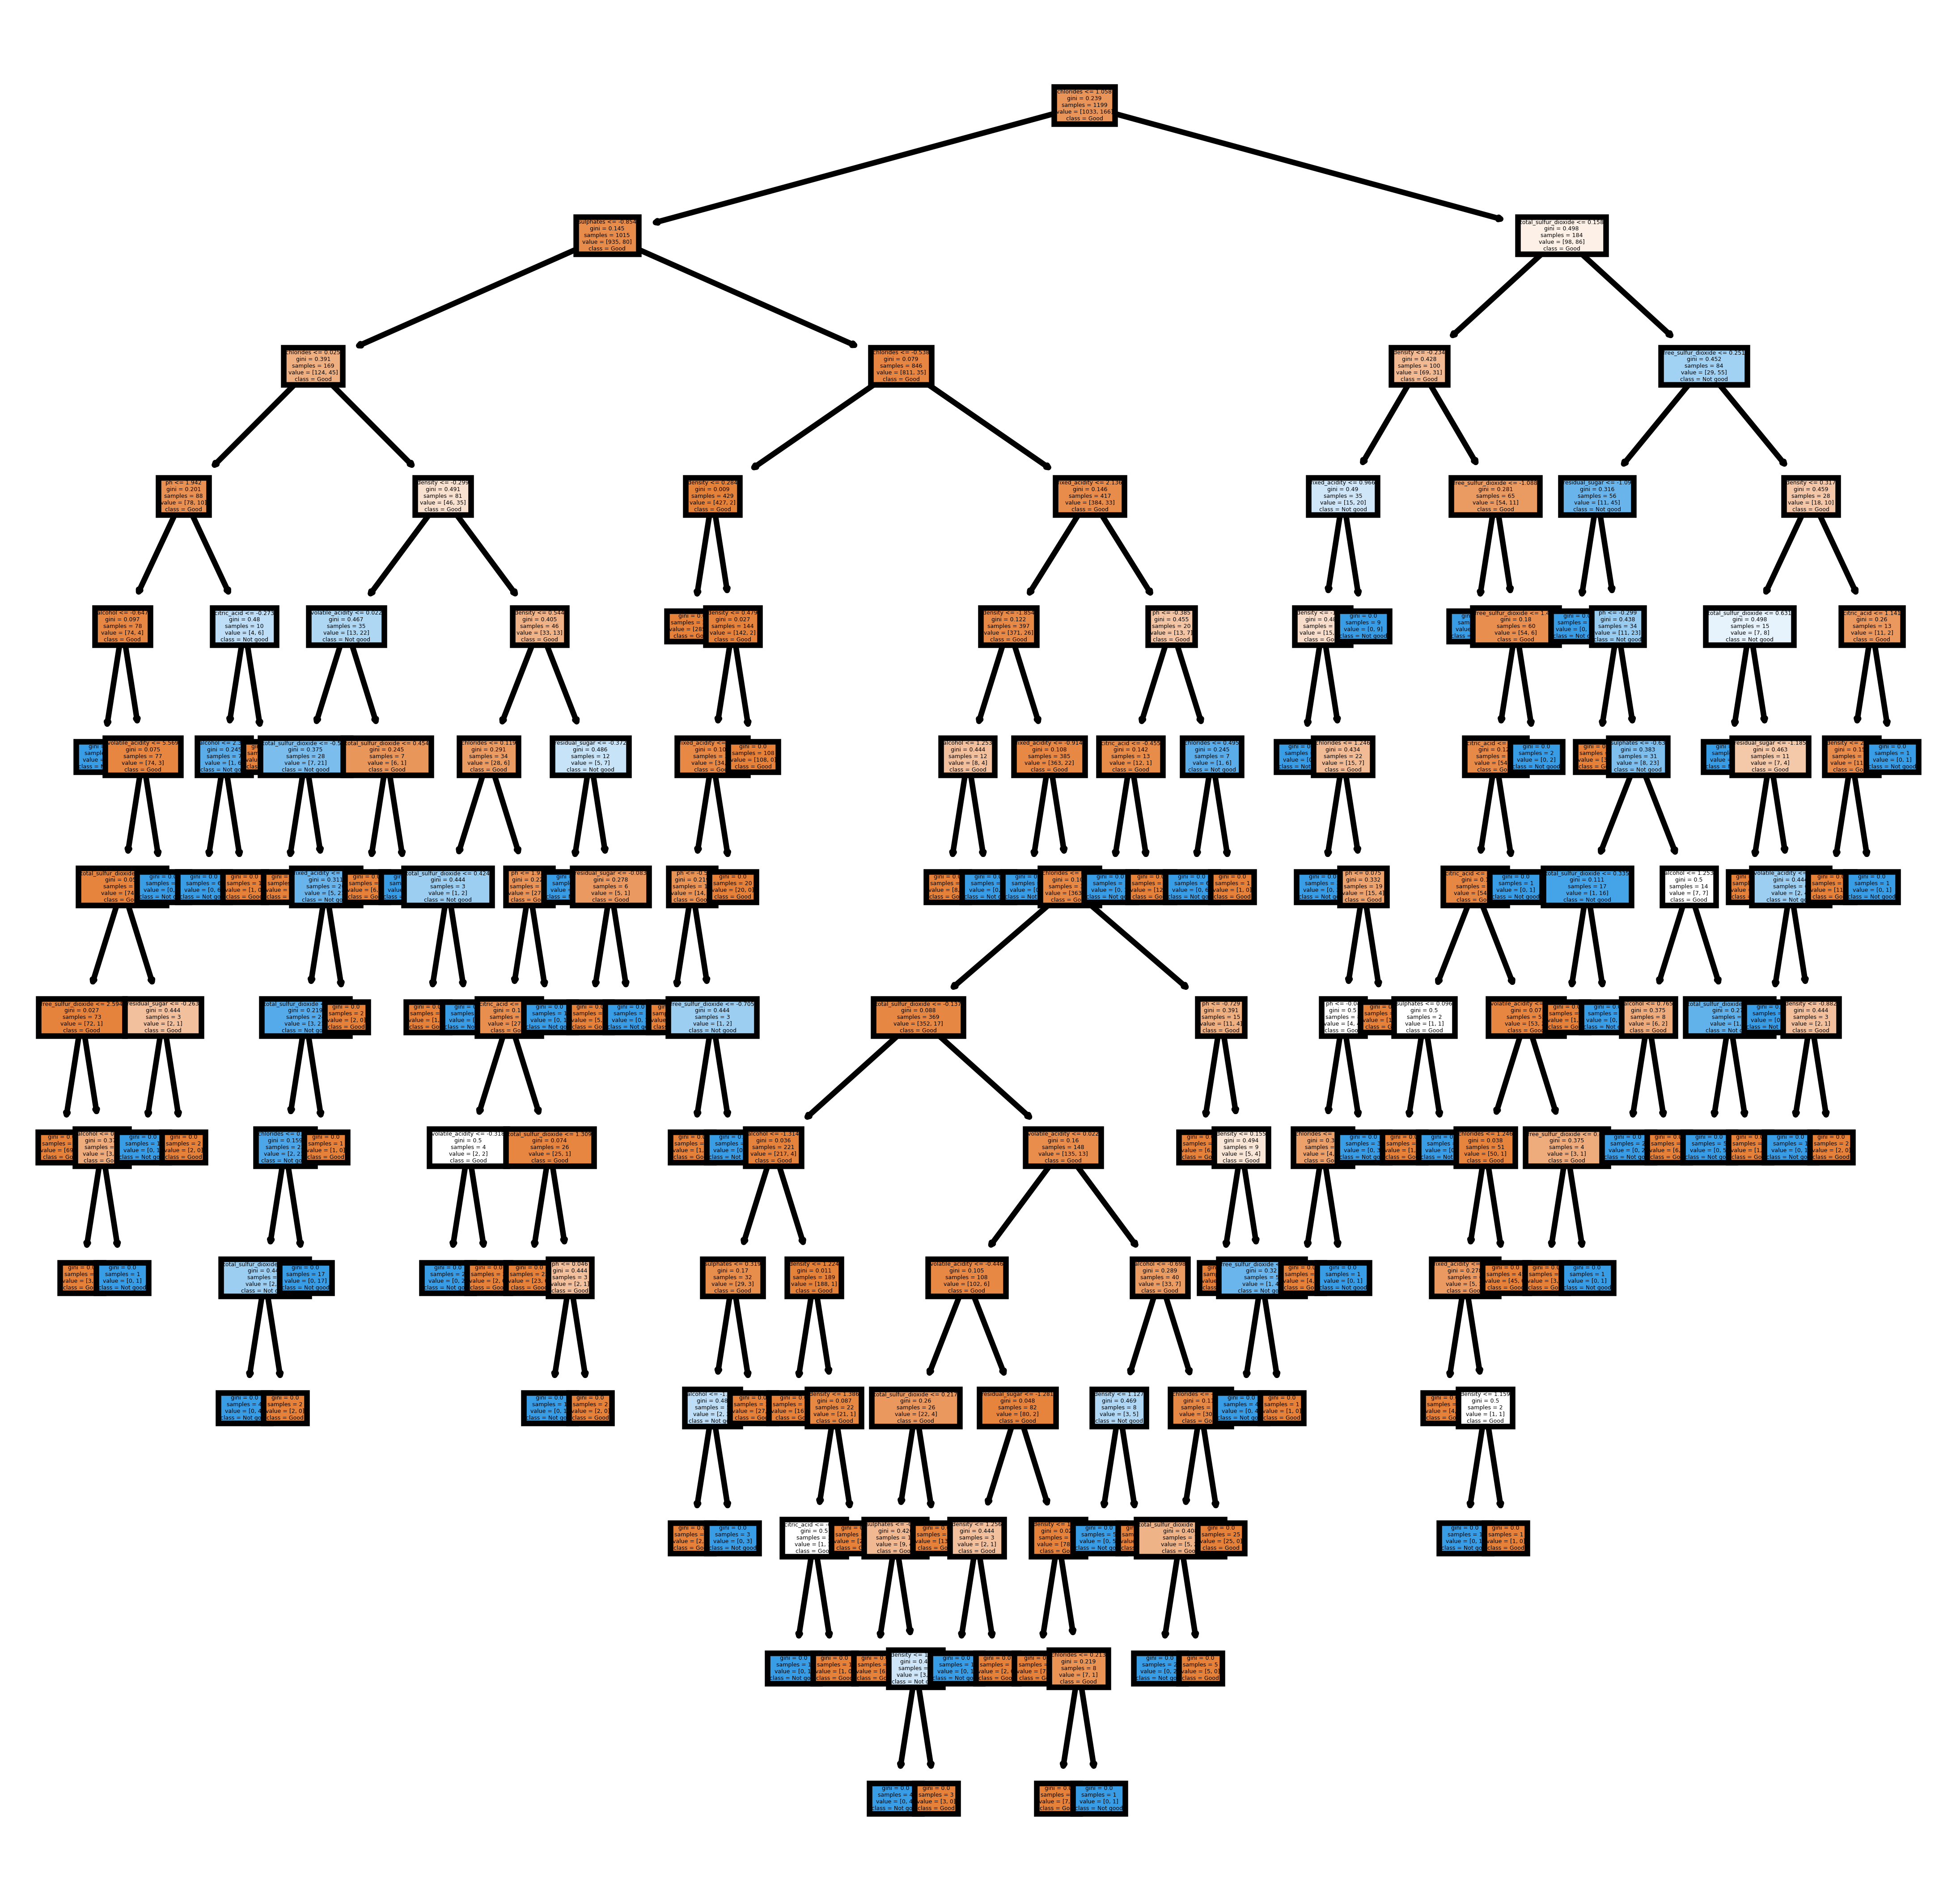

In [92]:
import matplotlib.pyplot as plt
fn=['ph', 'sulphates', 'alcohol', 'fixed_acidity', 'volatile_acidity', 'free_sulfur_dioxide', 'citric_acid', 'residual_sugar', 'density', 
'total_sulfur_dioxide', 'chlorides']
cn=['Good','Not good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)

tree.plot_tree(model3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Redmodel3Tree.png')

In [113]:
# reportout1 = classification_report(y_test, y_pred1, output_dict=True)
# print(reportout1)

#### Combine all the model outputs for visualization into Tableau

In [94]:
df_out1 = pd.DataFrame(reportout1).transpose()
df_out1

,precision,recall,f1-score,support
0,0.918994,0.942693,0.930693,349.0000
1,0.523810,0.431373,0.473118,51.0000
accuracy,0.877500,0.877500,0.877500,0.8775
macro avg,0.721402,0.687033,0.701906,400.0000
weighted avg,0.868608,0.877500,0.872352,400.0000


In [95]:
reportout1  = classification_report(y_test, y_pred1 , output_dict=True)
reportout2  = classification_report(y_test, y_pred2 , output_dict=True)
reportout3  = classification_report(y_test, y_pred3 , output_dict=True)
reportout4  = classification_report(y_test, y_pred4 , output_dict=True)
reportout5  = classification_report(y_test, y_pred5 , output_dict=True)
reportout6  = classification_report(y_test, y_pred6 , output_dict=True)
reportout7  = classification_report(y_test, y_pred7 , output_dict=True)
reportout8  = classification_report(y_test, y_pred8 , output_dict=True)
reportout9  = classification_report(y_test, y_pred9 , output_dict=True)
reportout10 = classification_report(y_test, y_pred10, output_dict=True)

In [96]:
df_out1  = pd.DataFrame(reportout1).transpose()
df_out2  = pd.DataFrame(reportout2).transpose()
df_out3  = pd.DataFrame(reportout3).transpose()
df_out4  = pd.DataFrame(reportout4).transpose()
df_out5  = pd.DataFrame(reportout5).transpose()
df_out6  = pd.DataFrame(reportout6).transpose()
df_out7  = pd.DataFrame(reportout7).transpose()
df_out8  = pd.DataFrame(reportout8).transpose()
df_out9  = pd.DataFrame(reportout9).transpose()
df_out10 = pd.DataFrame(reportout10).transpose()

In [97]:
df_out1= df_out1[1:3]
df_out1

,precision,recall,f1-score,support
1,0.52381,0.431373,0.473118,51.0000
accuracy,0.87750,0.877500,0.877500,0.8775


In [98]:
# df_out2

In [99]:
df_out2 = df_out2[1:3]
df_out3 = df_out3[1:3]
df_out4 = df_out4[1:3]
df_out5 = df_out5[1:3]
df_out6 = df_out6[1:3]
df_out7 = df_out7[1:3]
df_out8 = df_out8[1:3]
df_out9 = df_out9[1:3]
df_out10= df_out10[1:3]

In [100]:
# df_out9

In [101]:
output_df = df_out1.append([df_out2, df_out3, df_out4, df_out5, df_out6, df_out7, df_out8, df_out9, df_out10])
output_df.drop(columns="support", axis=1, inplace=True)
output_df

,precision,recall,f1-score
1,0.523810,0.431373,0.473118
accuracy,0.877500,0.877500,0.877500
1,0.566667,0.333333,0.419753
accuracy,0.882500,0.882500,0.882500
1,0.380282,0.529412,0.442623
accuracy,0.830000,0.830000,0.830000
1,0.619048,0.509804,0.559140
accuracy,0.897500,0.897500,0.897500
1,0.564103,0.431373,0.488889
accuracy,0.885000,0.885000,0.885000


#### columns
- 0 - Precision
- 1 - Recall
- 2 - F1 score
- 3-5 - Accuracy

In [104]:
output_df = pd.DataFrame([y.values.ravel() for x , y in output_df.groupby(np.arange(len(output_df))//2)])
output_df

,0,1,2,3,4,5
0,0.523810,0.431373,0.473118,0.8775,0.8775,0.8775
1,0.566667,0.333333,0.419753,0.8825,0.8825,0.8825
2,0.380282,0.529412,0.442623,0.8300,0.8300,0.8300
3,0.619048,0.509804,0.559140,0.8975,0.8975,0.8975
4,0.564103,0.431373,0.488889,0.8850,0.8850,0.8850
5,0.353846,0.901961,0.508287,0.7775,0.7775,0.7775
6,0.367188,0.921569,0.525140,0.7875,0.7875,0.7875
7,0.340909,0.882353,0.491803,0.7675,0.7675,0.7675
8,0.364341,0.921569,0.522222,0.7850,0.7850,0.7850
9,0.330935,0.901961,0.484211,0.7550,0.7550,0.7550


In [112]:
# output_df.drop(labels='4')

In [ ]:
output_df.to_csv('df_test.csv', index = False)